In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import joblib

In [2]:
df=pd.read_csv('preprocessed_dataset.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

C:\Users\Praveen\AppData\Local\Temp\ipykernel_17004\3254061002.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace(encode)


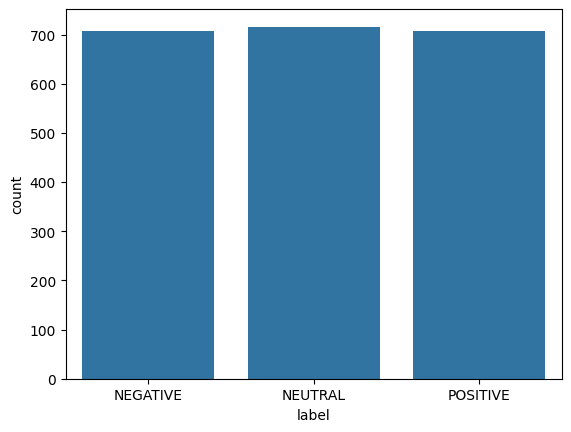

In [3]:
sns.countplot(x='label', data=df)

# df.isnull().sum().sum()

encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 0} )
df_encoded = df.replace(encode)

X=df_encoded.drop(["label"]  ,axis=1)
y = df_encoded.loc[:,'label'].values

In [4]:
X_orig=df_encoded.drop(["label"]  ,axis=1)
y_orig = to_categorical(df_encoded.loc[:,'label'].values)
print(X_orig.shape)
print(y_orig.shape)

(2132, 2548)
(2132, 2)


In [6]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical

# # Assuming df_encoded is your dataframe with 'label' column and features
# X_orig = df_encoded.drop(["label"], axis=1).values
# y_orig = to_categorical(df_encoded['label'].values)

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# # Hopfield Network class
# class HopfieldNetwork:
#     def __init__(self, num_units):
#         self.num_units = num_units
#         self.weights = np.zeros((num_units, num_units))

#     def train(self, patterns):
#         for pattern in patterns:
#             # Outer product to form the weight matrix
#             self.weights += np.outer(pattern, pattern)
        
#         # Set the diagonal to 0 to avoid self-connections
#         np.fill_diagonal(self.weights, 0)

#     def recall(self, pattern, steps=5):
#         # Update the pattern for a number of steps
#         for _ in range(steps):
#             pattern = self.activation_function(np.dot(pattern, self.weights))
#         return pattern

#     @staticmethod
#     def activation_function(x):
#         # Activation function (sign function)
#         return np.where(x >= 0, 1, -1)

# # Prepare binary training patterns from X_train (input features)
# # Convert input features to bipolar format for Hopfield training
# train_patterns = []
# for i in range(X_train.shape[0]):
#     pattern = (X_train[i] * 2) - 1  # Convert to bipolar (-1, 1)
#     train_patterns.append(pattern)

# train_patterns = np.array(train_patterns)

# # Create and train the Hopfield Network with the input features
# hopfield_net = HopfieldNetwork(num_units=X_train.shape[1])  # Number of input features
# hopfield_net.train(train_patterns)

# # Prepare test set for evaluation
# y_pred = []
# for test_instance in X_test:
#     # Convert the test instance to bipolar representation
#     bipolar_test_instance = (test_instance * 2) - 1  # Convert to bipolar (-1, 1)
    
#     # Recall the closest stored pattern
#     recalled_pattern = hopfield_net.recall(bipolar_test_instance)
#     y_pred.append(recalled_pattern)

# # Convert predictions back to original format (non-bipolar)
# y_pred = np.array(y_pred)

# # For classification, you will need to map these recalled patterns back to the original label space.
# # You could cluster the recalled patterns or use another method to convert them back to labels.
# # In this simplified example, we'll compare recalled patterns directly to the training patterns.

# # Calculate accuracy based on how close recalled patterns are to the original patterns
# y_pred_classes = []
# for recalled_pattern in y_pred:
#     # Find the closest matching pattern in the training set
#     distances = np.sum(np.abs(train_patterns - recalled_pattern), axis=1)
#     closest_pattern_idx = np.argmin(distances)
    
#     # Use the label of the closest pattern
#     predicted_class = np.argmax(y_train[closest_pattern_idx])  # Assuming labels are one-hot encoded
#     y_pred_classes.append(predicted_class)

# # Convert predictions and true labels for accuracy and confusion matrix
# y_pred_classes = np.array(y_pred_classes)
# expected_classes = np.argmax(y_test, axis=1)

# # Calculate accuracy
# accuracy = accuracy_score(expected_classes, y_pred_classes)
# print(f"Accuracy: {accuracy:.4f}")

# # Confusion matrix
# conf_matrix = confusion_matrix(expected_classes, y_pred_classes)
# print("Confusion Matrix:\n", conf_matrix)


In [7]:
# import torch
# import torch.nn.functional as F
# from torch_geometric.nn import GCNConv
# from torch_geometric.data import Data
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from tensorflow.keras.utils import to_categorical
# from torch_geometric.utils import dense_to_sparse



# # Convert the data to PyTorch tensors
# X_tensor = torch.tensor(X_orig.values, dtype=torch.float32)
# y_tensor = torch.tensor(np.argmax(y_orig, axis=1), dtype=torch.long)  # Convert one-hot to class indices

# # Split the data
# X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(
#     X_tensor, y_tensor,
#     test_size=0.2,
#     stratify=y_tensor,
#     random_state=42
# )

# # Create edge_index for the training data
# num_train_nodes = X_train_tensor.shape[0]
# adjacency_matrix_train = torch.ones(num_train_nodes, num_train_nodes)  # Fully connected
# edge_index_train, _ = dense_to_sparse(adjacency_matrix_train)

# # Create edge_index for the test data
# num_test_nodes = X_test_tensor.shape[0]
# adjacency_matrix_test = torch.ones(num_test_nodes, num_test_nodes)  # Fully connected
# edge_index_test, _ = dense_to_sparse(adjacency_matrix_test)

# # Define the GCN Model
# class ComplexGCN(torch.nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim, num_layers=3, dropout_rate=0.5):
#         super(ComplexGCN, self).__init__()
#         self.num_layers = num_layers
#         self.convs = torch.nn.ModuleList()
#         self.bns = torch.nn.ModuleList()
        
#         # First layer
#         self.convs.append(GCNConv(input_dim, hidden_dim))
#         self.bns.append(torch.nn.BatchNorm1d(hidden_dim))
        
#         # Hidden layers
#         for _ in range(num_layers - 2):
#             self.convs.append(GCNConv(hidden_dim, hidden_dim))
#             self.bns.append(torch.nn.BatchNorm1d(hidden_dim))
        
#         # Final layer
#         self.convs.append(GCNConv(hidden_dim, output_dim))
#         self.dropout_rate = dropout_rate

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
        
#         for i in range(self.num_layers - 1):
#             x = self.convs[i](x, edge_index)
#             x = self.bns[i](x)
#             x = F.relu(x)
#             x = F.dropout(x, p=self.dropout_rate, training=self.training)
        
#         # Final layer (without dropout)
#         x = self.convs[-1](x, edge_index)
#         return F.log_softmax(x, dim=1)

# # Create data objects for PyG
# data_train = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
# data_test = Data(x=X_test_tensor, edge_index=edge_index_test, y=y_test_tensor)

# # Define model parameters
# input_dim = X_train_tensor.shape[1]
# hidden_dim = 64  # You can adjust this
# output_dim = len(torch.unique(y_train_tensor))  # Number of classes

# # Initialize the model, optimizer, and loss function
# model = ComplexGCN(input_dim, hidden_dim, output_dim, num_layers=3, dropout_rate=0.5)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# loss_fn = torch.nn.CrossEntropyLoss()

# # Training Loop
# def train(data):
#     model.train()
#     optimizer.zero_grad()
#     out = model(data)
#     loss = loss_fn(out, data.y)
#     loss.backward()
#     optimizer.step()
#     return loss.item()

# # Evaluate the model
# def evaluate(data):
#     model.eval()
#     with torch.no_grad():
#         out = model(data)
#     return out

# # Training
# num_epochs = 20
# for epoch in range(num_epochs):
#     train_loss = train(data_train)
#     print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}')

# # Testing the model
# output = evaluate(data_test)
# pred_classes = output.argmax(dim=1)  # Get predicted classes

# # Calculate accuracy
# accuracy = (pred_classes == data_test.y).float().mean()
# print(f'Accuracy: {accuracy.item():.4f}')

# # Confusion Matrix
# expected_classes = data_test.y
# conf_matrix = confusion_matrix(expected_classes.cpu().numpy(), pred_classes.cpu().numpy())
# print("Confusion Matrix:\n", conf_matrix)


In [9]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Input
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# def get_feature_extractor(input_shape):
#     model = Sequential([
#         Dense(1024, activation='relu', input_shape=input_shape),
#         Dense(512, activation='relu'),
#         Dense(256, activation='relu'),
#         Dense(128, activation='relu')  
#     ])
#     return model

# input_shape = (X_train.shape[1],)  
# nn_model = get_feature_extractor(input_shape)

# nn_model.compile(optimizer='adam', loss='mse')

# X_train_features = nn_model.predict(X_train)
# X_test_features = nn_model.predict(X_test)

# print("Extracted features shape:", X_train_features.shape)  

# y_train_svm = np.argmax(y_train, axis=1)
# y_test_svm = np.argmax(y_test, axis=1)
# svm_model = SVC(kernel='linear', C=1.0)
# svm_model.fit(X_train_features, y_train_svm)

# y_pred = svm_model.predict(X_test_features)

# accuracy = accuracy_score(y_test_svm, y_pred)
# conf_matrix = confusion_matrix(y_test_svm, y_pred)

# print(f"SVM Accuracy: {accuracy * 100:.2f}%")
# print("Confusion Matrix:")
# print(conf_matrix)


In [5]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))
print(f"X_train  shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(y_train.shape)  # Should be (num_samples, num_classes)
print(y_test.shape)


X_train  shape: (1705, 1, 2548)
X_test  shape: (427, 1, 2548)
(1705, 2)
(427, 2)


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()


In [12]:
def get_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax') 
    ])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = get_cnn_model(input_shape)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)
model.save("../../Models/EEG/cnnmodel.h5")
score, acc = model.evaluate(X_test, y_test)
print(f"Accuracy : {acc}")

pred = model.predict(X_test)
predict_classes = np.argmax(pred, axis=1)
expected_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(expected_classes, predict_classes)
print("Confusion Matrix Accuracy: \n", conf_matrix)


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.2714 
Accuracy : 0.9718969464302063
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix Accuracy: 
 [[143   5   0]
 [  0 131   5]
 [  0   2 141]]


In [13]:
def get_LSTM_model():
    model = Sequential([
        LSTM(64, input_shape=(1,2548),activation="relu",return_sequences=True),
        Dropout(0.2),
        LSTM(32,activation="relu",return_sequences=True),
        Dropout(0.2),
        LSTM(16,activation="relu"),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    
    return model

model = get_LSTM_model()


model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])


history = model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), verbose = 0)
model.save("../../Models/EEG/lstmmodel.h5")
score, acc = model.evaluate(X_test, y_test)

print(f"Accuracy after Fine tuning Model {acc}")


pred = model.predict(X_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)

conf_matrix = confusion_matrix(expected_classes,predict_classes)
print("Confusion Matrix Accuracy: \n", conf_matrix)

c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0702 
Accuracy after Fine tuning Model 0.9812646508216858
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Confusion Matrix Accuracy: 
 [[148   0   0]
 [  1 129   6]
 [  0   1 142]]


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm_model = SVC(kernel='linear', C=1,probability=True)
svm_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
joblib.dump(svm_model,"../../Models/EEG/svmmodel.joblib")
y_pred_svm = svm_model.predict(X_test.reshape(X_test.shape[0], -1))

accuracy_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
conf_matrix_svm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_svm)

print(f"Accuracy of SVM: {accuracy_svm}")
print("Confusion Matrix of SVM:\n", conf_matrix_svm)


Accuracy of SVM: 0.9578454332552693
Confusion Matrix of SVM:
 [[284   7]
 [ 11 125]]


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
joblib.dump(decision_tree_model,"../../Models/EEG/dtmodel.joblib")
y_pred_dt = decision_tree_model.predict(X_test.reshape(X_test.shape[0], -1))

accuracy_dt = accuracy_score(np.argmax(y_test, axis=1), y_pred_dt)
conf_matrix_dt = confusion_matrix(np.argmax(y_test, axis=1), y_pred_dt)

print(f"Accuracy of Decision Tree: {accuracy_dt}")
print("Confusion Matrix of Decision Tree:\n", conf_matrix_dt)


Accuracy of Decision Tree: 0.9391100702576113
Confusion Matrix of Decision Tree:
 [[277  14]
 [ 12 124]]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))

y_pred_rf = random_forest_model.predict(X_test.reshape(X_test.shape[0], -1))

accuracy_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)
conf_matrix_rf = confusion_matrix(np.argmax(y_test, axis=1), y_pred_rf)

print(f"Accuracy of Random Forest: {accuracy_rf}")
print("Confusion Matrix of Random Forest:\n", conf_matrix_rf)


Accuracy of Random Forest: 0.9953161592505855
Confusion Matrix of Random Forest:
 [[291   0]
 [  2 134]]


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

def add_noise(data, noise_factor=0.2):  
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy_data, 0., 1.)

def get_denoising_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)
    
    x = Conv1D(64, 3, activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)  
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling1D(2, padding='same')(x)

    x = Conv1D(128, 3, activation='relu', padding='same')(encoded)
    x = BatchNormalization()(x)
    x = UpSampling1D(2)(x)
    x = Conv1D(64, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling1D(2)(x)
    decoded = Conv1D(input_shape[-1], 3, activation='sigmoid', padding='same')(x)
    autoencoder = Model(input_layer, decoded)
    return autoencoder

def get_classifier_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),  
        BatchNormalization(),  
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),  
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  
    ])
    return model

X_train_noisy = add_noise(X_train)
X_test_noisy = add_noise(X_test)

input_shape = (X_train.shape[1], X_train.shape[2])

autoencoder = get_denoising_autoencoder(input_shape)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

autoencoder.fit(X_train_noisy, X_train, epochs=50, batch_size=64, validation_data=(X_test_noisy, X_test), 
                callbacks=[early_stopping], verbose=1)

encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[4].output)  

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

classifier = get_classifier_model(X_train_encoded.shape[1:])
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(X_train_encoded, y_train, epochs=50, batch_size=64, validation_data=(X_test_encoded, y_test), 
               callbacks=[early_stopping], verbose=1)

score, acc = classifier.evaluate(X_test_encoded, y_test)
print(f"Classifier Accuracy: {acc}")

y_pred = classifier.predict(X_test_encoded)
predict_classes = np.argmax(y_pred, axis=1)
expected_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(expected_classes, predict_classes)
print("Confusion Matrix:\n", conf_matrix)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 1.3141 - val_loss: 0.8708
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.1872 - val_loss: 0.8255
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.8246 - val_loss: 0.7939
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.8911 - val_loss: 0.7487
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.8488 - val_loss: 0.7137
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.8227 - val_loss: 0.6806
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.8925 - val_loss: 0.6608
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.8269 - val_loss: 0.6470
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.8743 - val_loss: 0.6473
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7754 - val_loss: 0.6413
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.8562 - val_loss: 0.6298
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7

c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3973 - loss: 1.8944 - val_accuracy: 0.4801 - val_loss: 0.8516
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6215 - loss: 1.0085 - val_accuracy: 0.8642 - val_loss: 0.5028
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7488 - loss: 0.7180 - val_accuracy: 0.8946 - val_loss: 0.3775
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7571 - loss: 0.6745 - val_accuracy: 0.8946 - val_loss: 0.3314
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8036 - loss: 0.5657 - val_accuracy: 0.8899 - val_loss: 0.3054
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8111 - loss: 0.4978 - val_accuracy: 0.9063 - val_loss: 0.2791
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.4997 - val_accuracy: 0.9087 - val_loss: 0.2573
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8639 - loss: 0.4365 - val_accuracy: 0.9133 - val_loss: 0.2513
Ep

In [18]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU, Add, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model


def get_complex_classifier_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Flatten()(inputs)
    x = Dense(256, kernel_regularizer=l2(0.001))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x1 = Dense(128, kernel_regularizer=l2(0.001))(x)
    x1 = LeakyReLU(alpha=0.1)(x1)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.5)(x1)

    x2 = Dense(128, kernel_regularizer=l2(0.001))(x1)
    x2 = LeakyReLU(alpha=0.1)(x2)
    x2 = BatchNormalization()(x2)

    x = Add()([x1, x2])
    x = Dropout(0.5)(x)

    x = Dense(64, kernel_regularizer=l2(0.001))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(3, activation='softmax')(x)  
    model = Model(inputs, outputs)
    return model

complex_classifier = get_complex_classifier_model(X_train_encoded.shape[1:])
complex_classifier.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

complex_classifier.fit(X_train_encoded, y_train, epochs=50, batch_size=64, validation_data=(X_test_encoded, y_test), 
                       callbacks=[early_stopping], verbose=1)

score, acc = complex_classifier.evaluate(X_test_encoded, y_test)
print(f"Classifier Accuracy: {acc}")

y_pred = complex_classifier.predict(X_test_encoded)
predict_classes = np.argmax(y_pred, axis=1)
expected_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(expected_classes, predict_classes)
print("Confusion Matrix:\n", conf_matrix)


Epoch 1/50


c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4807 - loss: 1.9280 - val_accuracy: 0.7541 - val_loss: 1.7159
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7021 - loss: 1.3169 - val_accuracy: 0.8946 - val_loss: 1.0928
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8233 - loss: 1.0900 - val_accuracy: 0.9040 - val_loss: 0.9169
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8265 - loss: 1.0476 - val_accuracy: 0.9133 - val_loss: 0.8209
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8538 - loss: 0.9802 - val_accuracy: 0.9157 - val_loss: 0.7830
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8739 - loss: 0.8856 - val_accuracy: 0.9180 - val_loss: 0.7782
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8527 - loss: 0.9212 - val_accuracy: 0.9204 - val_loss: 0.7607
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8637 - loss: 0.9123 - val_accuracy: 0.9133 - val_loss: 0.7405
Ep